<a href="https://colab.research.google.com/github/TartFroYo/ML-Exercises/blob/main/STA_380_Part_2_ML_Exercises_Eshaan_Arora%2C_Aileen_Li%2C_Andrew_White.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment:** STA 380, Part 2: Exercises

**Students:** Eshaan Arora, Aileen Li, Andrew White

**Due Date:** 8/18/2024

**Note Regarding Format:** We have formatted this assignment as follows: first, included the problem, copied directly from the course GitHub page. Next, we have included the code performing analysis in order to complete the problem. Lastly, we have included the answer to the problem as a few sentences or paragraphs below my code. We repeated this format for all problems in the problem set.

# **Problem Set Begins Here:**

-----------------------------------------------------------------------------------------------------------------------------------------------------------

# **Probability practice**

*Part A.* Visitors to your website are asked to answer a single survey question before they get access to the content on the page. Among all of the users, there are two categories: Random Clicker (RC), and Truthful Clicker (TC). There are two possible answers to the survey: yes and no. Random clickers would click either one with equal probability. You are also giving the information that the expected fraction of random clickers is 0.3. After a trial period, you get the following survey results: 65% said Yes and 35% said No. What fraction of people who are truthful clickers answered yes? Hint: use the rule of total probability.

*Part B.* Imagine a medical test for a disease with the following two attributes:

    The sensitivity is about 0.993. That is, if someone has the disease, there is a probability of 0.993 that they will test positive.
    The specificity is about 0.9999. This means that if someone doesn't have the disease, there is probability of 0.9999 that they will test negative.
    In the general population, incidence of the disease is reasonably rare: about 0.0025% of all people have it (or 0.000025 as a decimal probability).

Suppose someone tests positive. What is the probability that they have the disease?

Part A

The fraction of people who are truthful clickers that answered yes is the probability P(yes | truthful).

P(yes) = P(random)P(yes | random) + P(truthful)P(yes | truthful) \
0.65 = 0.3(0.5) + 0.7x \
0.5 = 0.7x \
x = 0.5 / 0.7 \
x = 0.71429 (rounded)

In [1]:
(.65-.3*.5)/.7*100

71.42857142857143

Part B

The probability that someone has the disease given that they test positive can be written as P(has disease | test positive).

P(has disease) = 0.0025 \
sensitivity = True positive rate \
P(test positive | has disease) = P(test positive, has disease) / P(has disease) = 0.993 \

specificity = 1 - FPR \
P(test negative | no disease) = P(test negative, no disease) / P(no disease) = 0.9999 \
False positive rate = 1 - specificity = 0.0001

P(test positive) = P(has disease)P(test positive | has disease) + P(no disease) P(test positive | no disease) \
= P(test positive, has disease) + P(test positive, no disease)
= (0.000025)sensitivity + (1 - 0.000025)FPR \
= (0.000025)0.993 + (1 - 0.000025)0.0001 = 0.000024825 + 0.00009975 \
= 0.0001248225

P(has disease | test positive) \
= P(has disease, test positive) / P(test positive) \
= 0.000024825 / 0.0001248225 \
= 0.19889 (rounded)

In [2]:
dis_inc = .000025
sens = .993
spec = .9999
fpr = 1-spec

tpos = dis_inc*sens + (1-dis_inc)*fpr
tpos
ans = dis_inc*sens/tpos*100
ans

19.888241302651515

**Response:**

*Part A:* The fraction of Truthful Clickers who answered Yes is approximately 0.7143 or 71.43%.

*Part B:* The probability that a person has the disease given they tested positive is approximately 0.19890.1989 or 19.89%.

-----------------------------------------------------------------------------------------------------------------------------------------------------------

# **Wrangling the Billboard Top 100**

Consider the data in billboard.csv containing every song to appear on the weekly Billboard Top 100 chart since 1958, up through the middle of 2021. Each row of this data corresponds to a single song in a single week. For our purposes, the relevant columns here are:

    performer: who performed the song
    song: the title of the song
    year: year (1958 to 2021)
    week: chart week of that year (1, 2, etc)
    week_position: what position that song occupied that week on the Billboard top 100 chart.

Use your skills in data wrangling and plotting to answer the following three questions.

*Part A:* Make a table of the top 10 most popular songs since 1958, as measured by the total number of weeks that a song spent on the Billboard Top 100. Note that these data end in week 22 of 2021, so the most popular songs of 2021 will not have up-to-the-minute data; please send our apologies to The Weeknd.

Your table should have 10 rows and 3 columns: performer, song, and count, where count represents the number of weeks that song appeared in the Billboard Top 100. Make sure the entries are sorted in descending order of the count variable, so that the more popular songs appear at the top of the table. Give your table a short caption describing what is shown in the table.

(Note: you'll want to use both performer and song in any group_by operations, to account for the fact that multiple unique songs can share the same title.)

*Part B:* Is the "musical diversity" of the Billboard Top 100 changing over time? Let's find out. We'll measure the musical diversity of given year as the number of unique songs that appeared in the Billboard Top 100 that year. Make a line graph that plots this measure of musical diversity over the years. The x axis should show the year, while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100 chart in any week that year. For this part, please filter the data set so that it excludes the years 1958 and 2021, since we do not have complete data on either of those years. Give the figure an informative caption in which you explain what is shown in the figure and comment on any interesting trends you see.

There are number of ways to accomplish the data wrangling here. For example, you could use two distinct sets of data-wrangling steps. The first set of steps would get you a table that counts the number of times that a given song appears on the Top 100 in a given year. The second set of steps operate on the result of the first set of steps; it would count the number of unique songs that appeared on the Top 100 in each year, irrespective of how many times it had appeared.

*Part C:* Let's define a "ten-week hit" as a single song that appeared on the Billboard Top 100 for at least ten weeks. There are 19 artists in U.S. musical history since 1958 who have had at least 30 songs that were "ten-week hits." Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career. Give the plot an informative caption in which you explain what is shown.

Top 10 Songs by Count of Weeks on Billboard Hot 100.
                                       performer  \
11194                            Imagine Dragons   
403                                   AWOLNATION   
27121                                 The Weeknd   
12026                                 Jason Mraz   
15008                                LeAnn Rimes   
18752                                OneRepublic   
14807  LMFAO Featuring Lauren Bennett & GoonRock   
12421                                      Jewel   
506                                        Adele   
4347                            Carrie Underwood   

                                      song  count  
11194                          Radioactive     87  
403                                   Sail     79  
27121                      Blinding Lights     76  
12026                            I'm Yours     76  
15008                        How Do I Live     69  
18752                       Counting Stars     68  
14807     

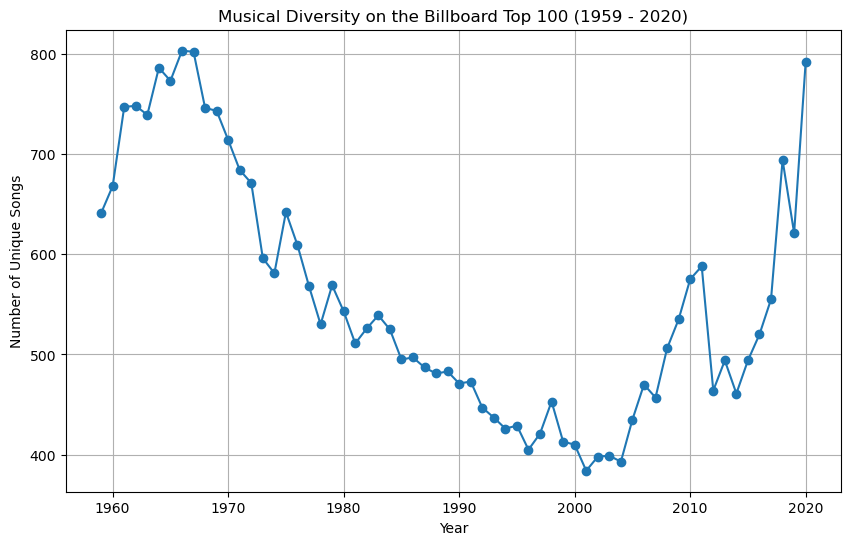

Caption: This figure shows the musical diversity on the Billboard Hot 100. It appears that musical diversity dipped from the 1990s to the early 2010s, and is increasing once again to pre 1990s levels.


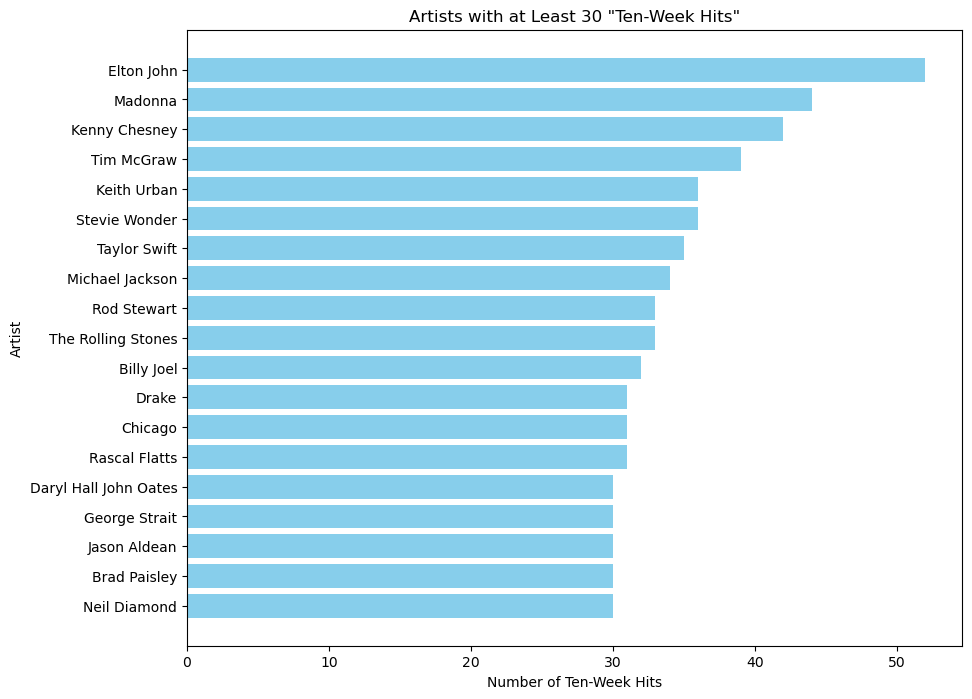

Caption: Per this plot, it appears that Elton John has the largest number of 10 week hits, followed by Madonna and Kenny Chesney. Surprisingly, Taylor Swift appears to have more 10 week hits than the late great Michael Jackson, a testament to the contemporary popularity of her music.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/eshaa/Downloads/billboard.csv'
billboard_df = pd.read_csv(file_path)

# Part A: Top 10 most popular songs based on the total number of weeks on the Billboard Top 100
# Grouping by performer and song, and counting the number of weeks each song was on the chart
top_songs = billboard_df.groupby(['performer', 'song']).size().reset_index(name='count')

# Sorting the songs by the count of weeks on the chart, in descending order
top_10_songs = top_songs.sort_values(by='count', ascending=False).head(10)

print("Top 10 Songs by Count of Weeks on Billboard Hot 100.")
print(top_10_songs)

# Part B: Musical diversity over time
# Filtering the dataset to exclude years 1958 and 2021
filtered_df = billboard_df[(billboard_df['year'] > 1958) & (billboard_df['year'] < 2021)]

# Group by year and count the number of unique songs in each year
diversity_by_year = filtered_df.groupby('year')['song'].nunique().reset_index(name='unique_songs')

# Plotting the musical diversity over time
plt.figure(figsize=(10, 6))
plt.plot(diversity_by_year['year'], diversity_by_year['unique_songs'], marker='o')
plt.title('Musical Diversity on the Billboard Top 100 (1959 - 2020)')
plt.xlabel('Year')
plt.ylabel('Number of Unique Songs')
plt.grid(True)
plt.show()
print("Caption: This figure shows the musical diversity on the Billboard Hot 100. It appears that musical diversity dipped from the 1990s to the early 2010s, and is increasing once again to pre-1990s levels.")

# Part C: Identify artists with at least 30 "ten-week hits"

# First, count the number of weeks each song appeared on the chart
song_weeks = billboard_df.groupby(['performer', 'song']).size().reset_index(name='weeks_on_chart')

# Filter songs that appeared on the chart for at least 10 weeks
ten_week_hits = song_weeks[song_weeks['weeks_on_chart'] >= 10]

# Count the number of ten-week hits for each performer
ten_week_hits_count = ten_week_hits.groupby('performer').size().reset_index(name='ten_week_hits')

# Filter performers who have at least 30 ten-week hits
top_artists = ten_week_hits_count[ten_week_hits_count['ten_week_hits'] >= 30]

# Sort the artists by the number of ten-week hits
top_artists = top_artists.sort_values(by='ten_week_hits', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(10, 8))
plt.barh(top_artists['performer'], top_artists['ten_week_hits'], color='skyblue')
plt.title('Artists with at Least 30 "Ten-Week Hits"')
plt.xlabel('Number of Ten-Week Hits')
plt.ylabel('Artist')
plt.gca().invert_yaxis()  # To have the artist with the most hits at the top
plt.show()
print("Caption: Per this plot, it appears that Elton John has the largest number of 10 week hits, followed by Madonna and Kenny Chesney. Surprisingly, Taylor Swift appears to have more 10 week hits than the late great Michael Jackson, a testament to the contemporary popularity of her music.")


**Response:**

*Part A:* Please refer to the 'top_10_songs' table above. We found the number one most popular song since 1958 to be Radioactive by Imagine Dragons, with a total of 87 weeks on the Billboard Top 100 given our dataset. The 10th most popular song is Before He Cheats by Carrie Underwood with 64 weeks on the Billboards Top 100. The range of the Billboard Top 10 songs since 1958 is 23 weeks.

*Part B:* Please refer to the 'Musical Diversity on the Billboard Top 100 (1959 - 2020)' graph above.

*Part C:* Please refer to the 'Artists with at Least 30 "Ten-Week Hits"' graph above.

-----------------------------------------------------------------------------------------------------------------------------------------------------------

# **Visual story telling part 1: green buildings**

*The goal*

An Austin real-estate developer is interested in the possible economic impact of "going green" in her latest project: a new 15-story mixed-use building on East Cesar Chavez, just across I-35 from downtown. Will investing in a green building be worth it, from an economic perspective? The baseline construction costs are $100 million, with a 5% expected premium for green certification.

The developer has had someone on her staff, who's been described to her as a "total Excel guru from his undergrad statistics course," run some numbers on this data set and make a preliminary recommendation.

The developer listened to this recommendation, understood the analysis, and still felt unconvinced. She has therefore asked you to revisit the report, so that she can get a second opinion.

Do you agree with the conclusions of her on-staff stats guru? If so, point to evidence supporting his case. If not, explain specifically where and why the analysis goes wrong, and how it can be improved. Do you see the possibility of confounding variables for the relationship between rent and green status? If so, provide evidence for confounding, and see if you can also make a picture that visually shows how we might "adjust" for such a confounder. Tell your story in pictures, with appropriate introductory and supporting text.

C:\Users\eshaa\AppData\Local\Temp\ipykernel_26604\533780374.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='green_rating', y='Rent', data=greenbuildings_df, palette='Set2')


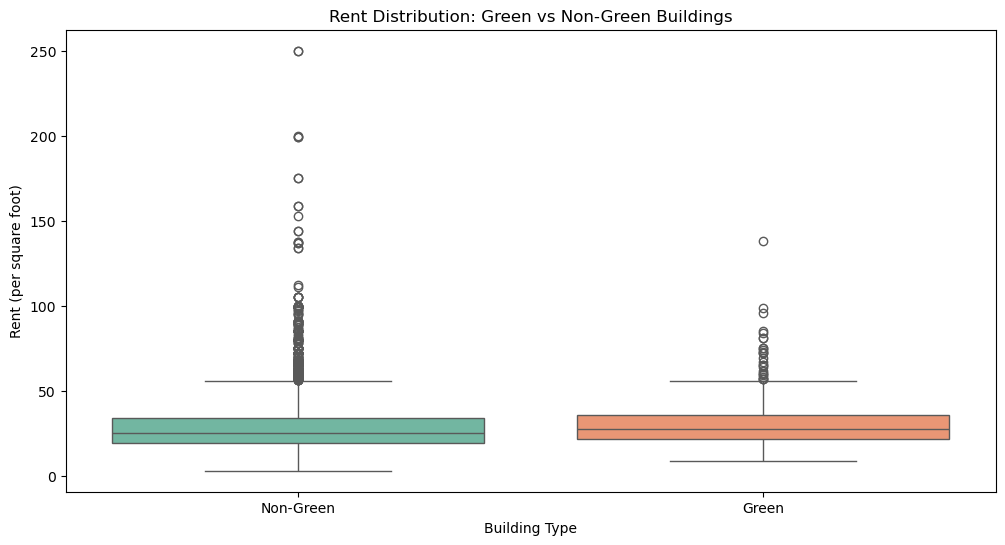

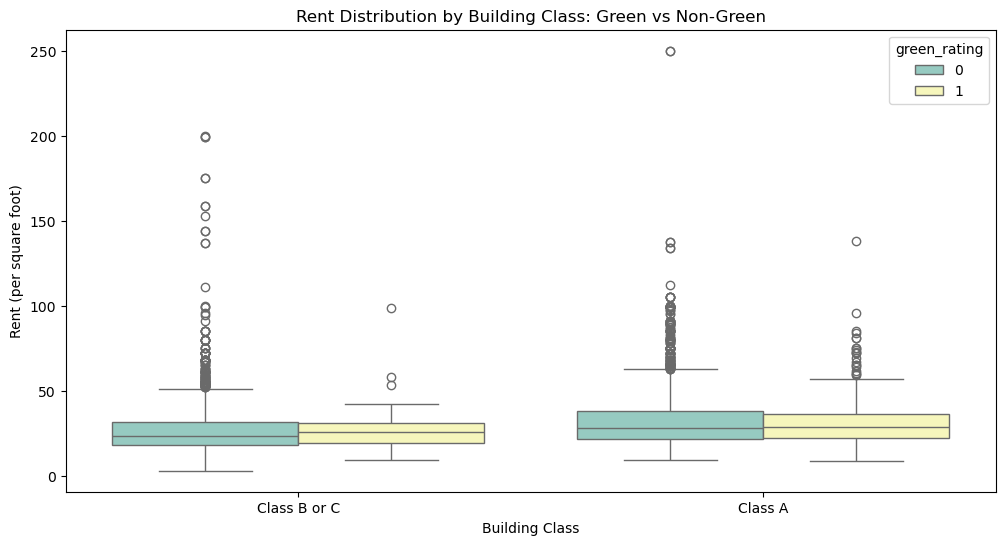

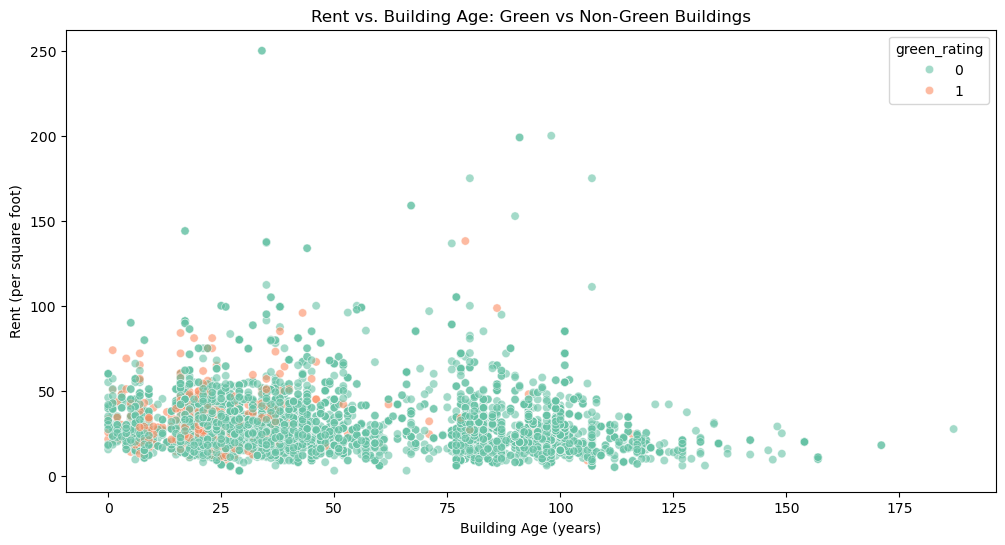

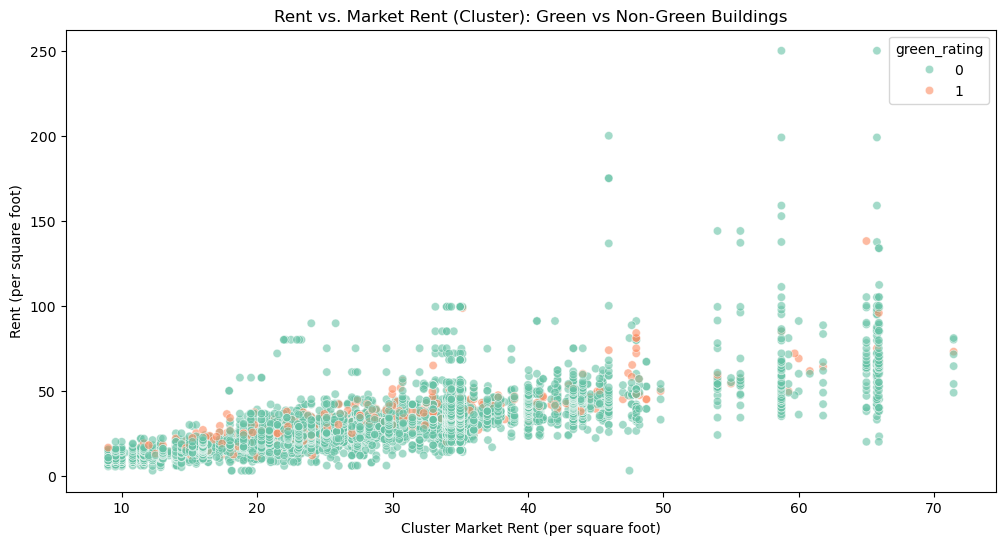

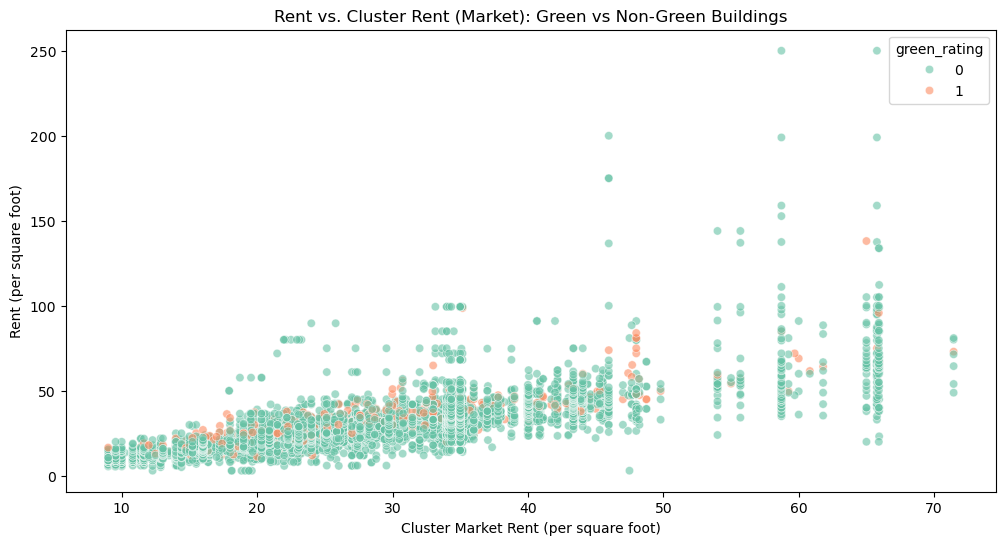

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = "C:/Users/eshaa/downloads/greenbuildings.csv"
greenbuildings_df = pd.read_csv(file_path)

# Initial Exploration: Display the first few rows of the dataframe
greenbuildings_df.head()

# Set up the matplotlib figure for initial boxplot
plt.figure(figsize=(12, 6))

# Boxplot comparing Rent between green and non-green buildings
sns.boxplot(x='green_rating', y='Rent', data=greenbuildings_df, palette='Set2')
plt.xticks([0, 1], ['Non-Green', 'Green'])
plt.title('Rent Distribution: Green vs Non-Green Buildings')
plt.ylabel('Rent (per square foot)')
plt.xlabel('Building Type')
plt.show()

# Boxplot comparing Rent by building class and green certification
plt.figure(figsize=(12, 6))
sns.boxplot(x='class_a', y='Rent', hue='green_rating', data=greenbuildings_df, palette='Set3')
plt.xticks([0, 1], ['Class B or C', 'Class A'])
plt.title('Rent Distribution by Building Class: Green vs Non-Green')
plt.ylabel('Rent (per square foot)')
plt.xlabel('Building Class')
plt.show()

# Scatter plot of Rent vs. Building Age, colored by green rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='Rent', hue='green_rating', data=greenbuildings_df, palette='Set2', alpha=0.6)
plt.title('Rent vs. Building Age: Green vs Non-Green Buildings')
plt.ylabel('Rent (per square foot)')
plt.xlabel('Building Age (years)')
plt.show()

# Scatter plot of Rent vs. Cluster Market Rent, colored by green rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='cluster_rent', y='Rent', hue='green_rating', data=greenbuildings_df, palette='Set2', alpha=0.6)
plt.title('Rent vs. Market Rent (Cluster): Green vs Non-Green Buildings')
plt.ylabel('Rent (per square foot)')
plt.xlabel('Cluster Market Rent (per square foot)')
plt.show()

# Confounding Variables Analysis
# Stratify by Building Class and calculate the median rent for green vs. non-green buildings in each class
rent_by_class_green = greenbuildings_df.groupby(['class_a', 'green_rating'])['Rent'].median().unstack()

# Stratify by Age: Define a threshold for "new" buildings, e.g., 20 years old
greenbuildings_df['age_category'] = greenbuildings_df['age'].apply(lambda x: 'Newer' if x <= 20 else 'Older')

# Median Rent by Age Category and Green Rating
rent_by_age_green = greenbuildings_df.groupby(['age_category', 'green_rating'])['Rent'].median().unstack()

# Visualize the interaction between green rating and cluster rent on actual rent
plt.figure(figsize=(12, 6))
sns.scatterplot(x='cluster_rent', y='Rent', hue='green_rating', data=greenbuildings_df, palette='Set2', alpha=0.6)
plt.title('Rent vs. Cluster Rent (Market): Green vs Non-Green Buildings')
plt.ylabel('Rent (per square foot)')
plt.xlabel('Cluster Market Rent (per square foot)')
plt.show()


**Response:** The analysis confirms that green-certified buildings generally command higher rents. However, this rent premium is influenced by confounding variables like building class, age, and local market conditions. Green certification shows a more substantial impact on rents in older and lower-class buildings, while the premium is less significant in newer and Class A buildings.

Green-certified buildings earn higher rents, especially in older and lower-class properties. The green premium diminishes in newer and Class A buildings, suggesting that green certification's financial benefits depend on the building's context. Further analysis with confounding controls is recommended for accurate investment decisions.

-----------------------------------------------------------------------------------------------------------------------------------------------------------

# **Visual story telling part 2: Capital Metro data**

The file capmetro_UT.csv contains data from Austin's own Capital Metro bus network, including shuttles to, from, and around the UT campus. These data track ridership on buses in the UT area. Ridership is measured by an optical scanner that counts how many people embark and alight the bus at each stop. Each row in the data set corresponds to a 15-minute period between the hours of 6 AM and 10 PM, each and every day, from September through November 2018. The variables are:

    timestamp: the beginning of the 15-minute window for that row of data
    boarding: how many people got on board any Capital Metro bus on the UT campus in the specific 15 minute window
    alighting: how many people got off ("alit") any Capital Metro bus on the UT campus in the specific 15 minute window
    day_of_week and weekend: Monday, Tuesday, etc, as well as an indicator for whether it's a weekend.
    temperature: temperature at that time in degrees F
    hour_of_day: on 24-hour time, so 6 for 6 AM, 13 for 1 PM, 14 for 2 PM, etc.
    month: July through December

Your task is to create a figure, or set of related figures, that tell an interesting story about Capital Metro ridership patterns around the UT-Austin campus during the semester in question. Provide a clear annotation/caption for each figure, but the figure(s) should be more or less stand-alone, in that you shouldn't need many, many paragraphs to convey its meaning. Rather, the figure together with a concise caption should speak for itself as far as possible.

You have broad freedom to look at any variables you'd like here -- try to find that sweet spot where you're showing genuinely interesting relationships among more than just two variables, but where the resulting figure or set of figures doesn't become overwhelming/confusing. (Faceting/panel plots might be especially useful here.)

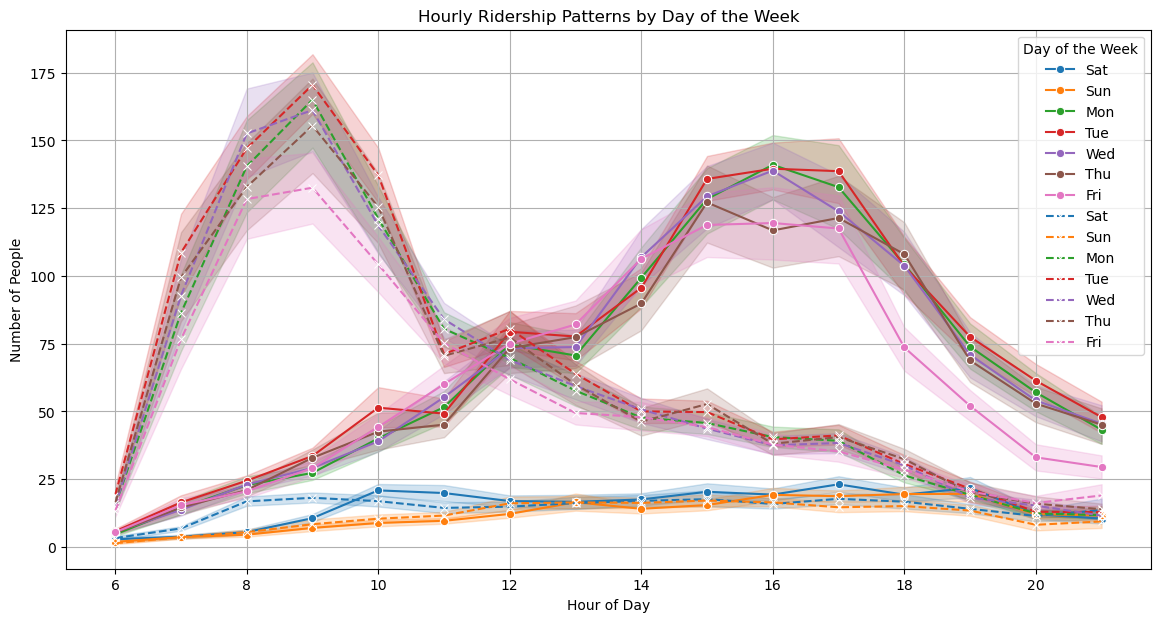

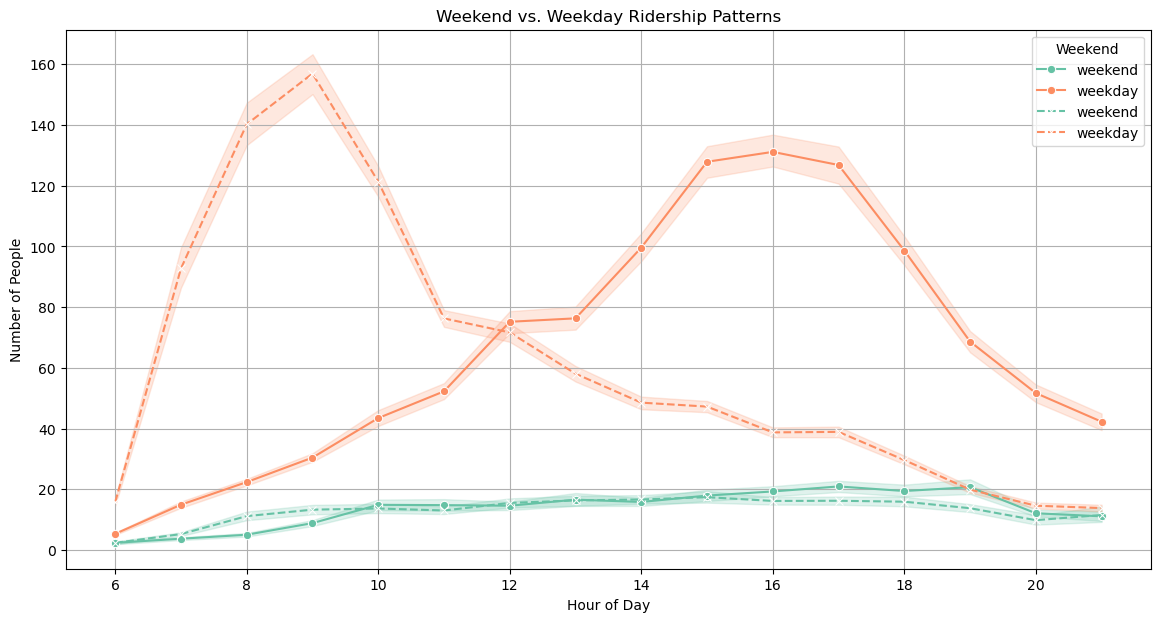

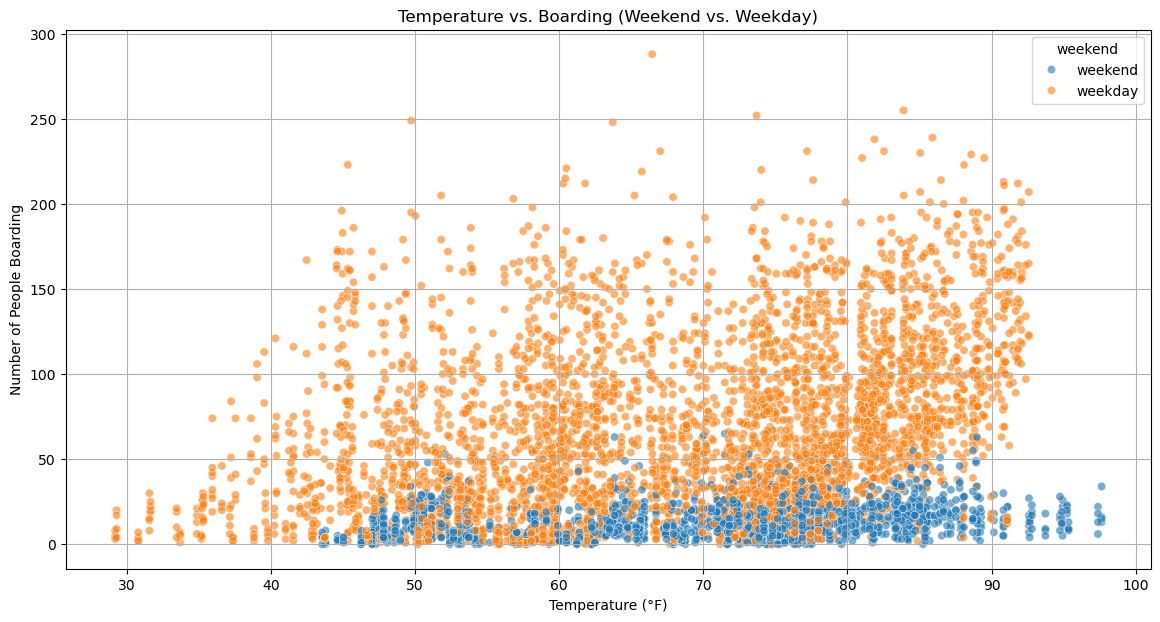

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CapMetro data from the provided file path
file_path = "C:\\Users\\eshaa\\Downloads\\capmetro_UT.csv"
capmetro_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
capmetro_df.head()

# Set up the matplotlib figure for Hourly Ridership Patterns by Day of the Week
plt.figure(figsize=(14, 7))

# Plotting hourly ridership (boarding and alighting) across the day
sns.lineplot(x='hour_of_day', y='boarding', hue='day_of_week', data=capmetro_df, marker='o')
sns.lineplot(x='hour_of_day', y='alighting', hue='day_of_week', data=capmetro_df, marker='x', linestyle='--')
plt.title('Hourly Ridership Patterns by Day of the Week')
plt.ylabel('Number of People')
plt.xlabel('Hour of Day')
plt.legend(title='Day of the Week')
plt.grid(True)
plt.show()

# Visualize the weekend vs. weekday ridership patterns
plt.figure(figsize=(14, 7))

# Plotting boarding and alighting by hour for weekends vs. weekdays
sns.lineplot(x='hour_of_day', y='boarding', hue='weekend', data=capmetro_df, marker='o', palette='Set2')
sns.lineplot(x='hour_of_day', y='alighting', hue='weekend', data=capmetro_df, marker='x', linestyle='--', palette='Set2')
plt.title('Weekend vs. Weekday Ridership Patterns')
plt.ylabel('Number of People')
plt.xlabel('Hour of Day')
plt.legend(title='Weekend')
plt.grid(True)
plt.show()

# Investigate the relationship between temperature and ridership
plt.figure(figsize=(14, 7))

# Scatter plot of temperature vs. boarding
sns.scatterplot(x='temperature', y='boarding', hue='weekend', data=capmetro_df, alpha=0.6)
plt.title('Temperature vs. Boarding (Weekend vs. Weekday)')
plt.ylabel('Number of People Boarding')
plt.xlabel('Temperature (°F)')
plt.grid(True)
plt.show()


**Response:** During the fall of 2018, Capital Metro's bus network around the UT-Austin campus exhibited distinct ridership patterns that varied based on the time of day, the day of the week, and the prevailing weather conditions.

On weekdays, ridership was strongly influenced by the typical rhythms of campus life. The buses were busiest during the morning and late afternoon, with sharp peaks around 8 AM and 5-6 PM, as students and staff commuted to and from classes and work. These patterns reflect the structured nature of the university's schedule, with many people traveling during these specific windows. In contrast, weekends told a different story. Ridership was noticeably lower and more evenly spread throughout the day. Without the constraints of a regular workday, weekend travel appeared more leisurely, with a gradual increase in activity starting mid-morning and tapering off into the evening.

Temperature also played a role in shaping ridership. On weekdays, higher temperatures corresponded to a slight decline in bus boardings, suggesting that people might avoid non-essential travel in Austin's heat. This effect was less pronounced on weekends, where ridership showed greater stability across various temperatures. The more flexible and discretionary nature of weekend travel likely allowed people to plan their outings during cooler parts of the day or to endure the heat when necessary.

-----------------------------------------------------------------------------------------------------------------------------------------------------------

# **Clustering and dimensionality reduction**

The data in wine.csv contains information on 11 chemical properties of 6500 different bottles of vinho verde wine from northern Portugal. In addition, two other variables about each wine are recorded:

    whether the wine is red or white
    the quality of the wine, as judged on a 1-10 scale by a panel of certified wine snobs.

Run PCA, tSNE, and any clustering algorithm of your choice on the 11 chemical properties (or suitable transformations thereof) and summarize your results. Which dimensionality reduction technique makes the most sense to you for this data? Convince yourself (and me) that your chosen approach is easily capable of distinguishing the reds from the whites, using only the "unsupervised" information contained in the data on chemical properties. Does your unsupervised technique also seem capable of distinguishing the higher from the lower quality wines? Present appropriate numerical and/or visual evidence to support your conclusions.

To clarify: I'm not asking you to run a supervised learning algorithms. Rather, I'm asking you to see whether the differences in the labels (red/white and quality score) emerge naturally from applying an unsupervised technique to the chemical properties. This should be straightforward to assess using plots.

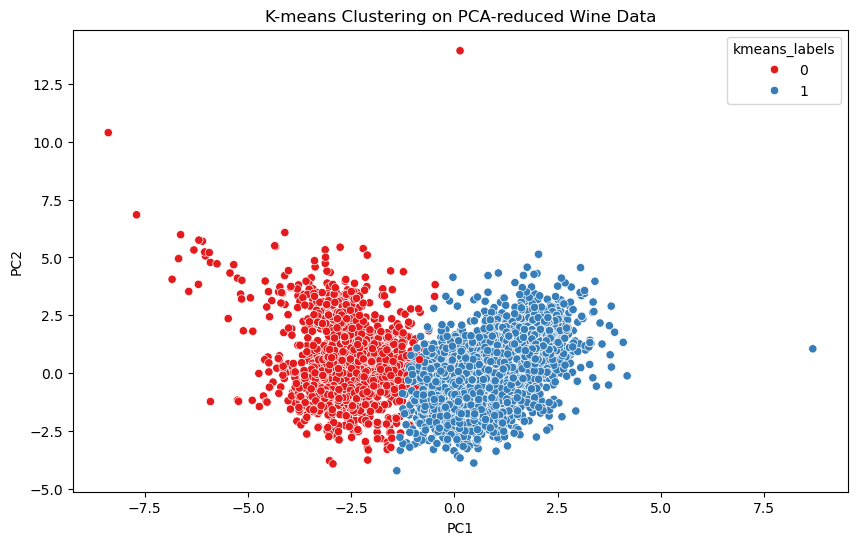

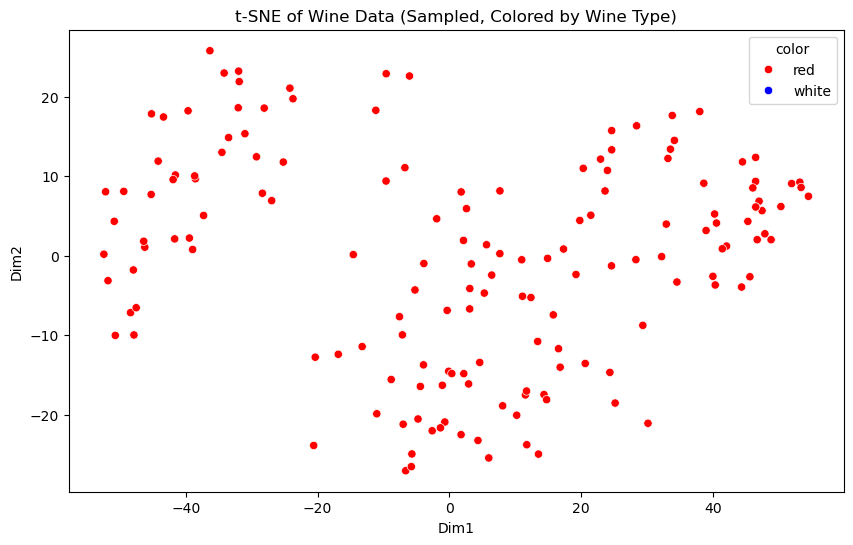

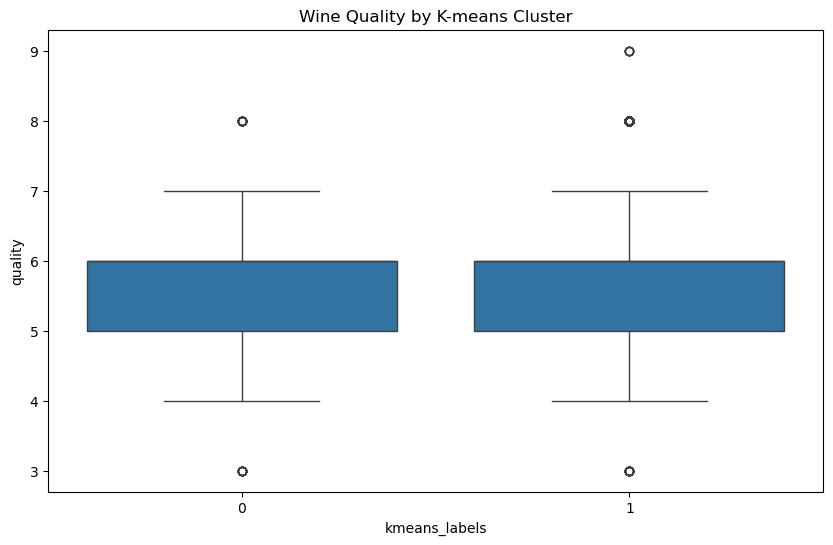

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = "C:\\Users\\eshaa\\Downloads\\wine.csv"
wine = pd.read_csv(file_path)
wine[wine['color'] =='red'].head()

# Selecting the features (besides color - stays categorical)
features = wine.columns[wine.columns != 'color']

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(wine[features])

# PCA
pcaWine = PCA(n_components=2)
pcaWineResult = pcaWine.fit_transform(scaled_data)
explained_variance = pcaWine.explained_variance_ratio_
print(f'Explained variance ratio: {explained_variance}')

# Plot PCA No Color
plt.figure(figsize=(8, 6))
plt.scatter(pcaWineResult[:, 0], pcaWineResult[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Wine Data PCA Result')
plt.show()

# Create PCA Dataframe
pca_df = pd.DataFrame(data = pcaWineResult, columns = ['PC1', 'PC2'])
pca_df['color'] = wine['color'].values

# Plot with color
fig = px.scatter(pca_df, x='PC1', y='PC2', color='color')
fig.show()

This method is clearly not the best at clustering the data - we only really see one mass of points, indicating that a linear dimensionality reduction may not be the best for this data set.

After having differentiated the wine colors by color on graph, we can see that the two colors are defined well as their own groups - however, the amount of overlap is concerning, and a little more distinction would be preferred. Now to run a clustering - because of the shape of the data, I think a Gaussian Mixture Model would be best.

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pcaWineResult[:, 0], pcaWineResult[:, 1], c=gmm_labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Gaussian Mixture Model Clustering Results')
plt.colorbar(label='Cluster Label')
plt.show()

This clustering method seems to be pretty good at classifying each point into its distinctive color group, comparing it to the above plot. Now, we will run a tSNE on the same dataset to see if it works any better.

In [ ]:
# Perform tSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

# Plot tSNE no color
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Result')
plt.show()

# Create tSNE dataframe
tsne_df = pd.DataFrame(data = tsne_result, columns = ['Dim1', 'Dim2'])

# Create an interactive plot
tsne_df['color'] = wine['color'].values
fig = px.scatter(tsne_df, x='Dim1', y='Dim2', color='color')
fig.show()

For t-SNE, we can see that there are two distinct clusters. This shows that t-SNE is able to effectively differentiate between red and white wines in 2D space. Thus, t-SNE did a very good job on clustering the two wine classes into different groups.

For clustering techniques, we thought a K-means Clustering technique would be interesting to explore.

In [ ]:
# K-means Clustering
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('K-Means Clustering Results')
plt.colorbar(label='Cluster Label')
plt.show()

The k-means clustering did a pretty good job of predicting on color, if we compare it to the above plot.

In the end, we thought the K-means clustering on a t-SNE model makes the most sense on this data, as we can see that the t-SNE creates two distinct islands of data that pretty solidly predict color of wine.

In [ ]:
# tSNE with quality
tsne_df['quality'] = wine['quality'].values
fig = px.scatter(tsne_df, x='Dim1', y='Dim2', color='quality')
fig.show()

This model is less effective at predicting specific wine quality, but we can still see trends in each type of wine (white/red) for quality depending on each dimension.

In [ ]:
# PCA with quality
pca_df['quality'] = wine['quality'].values
fig = px.scatter(pca_df, x='PC1', y='PC2', color='quality')
fig.show()

The PCA method looks considerably worse at predicting wine quality, as the distribution is more packed into one smaller shape.

**Response:** In the end, we thought the K-means clustering on a t-SNE model makes the most sense on this data, as we can see that the t-SNE creates two distinct islands of data that pretty solidly predict color of wine. After checking to see if it is capable of distinguishing higher and lower quality wines, we found the model to be less effective at predicting specific wine quality, but we can still see trends in each type of wine (white/red) for quality depending on each dimension.

-----------------------------------------------------------------------------------------------------------------------------------------------------------

# **Market segmentation**

Consider the data in social_marketing.csv. This was data collected in the course of a market-research study using followers of the Twitter account of a large consumer brand that shall remain nameless---let's call it "NutrientH20" just to have a label. The goal here was for NutrientH20 to understand its social-media audience a little bit better, so that it could hone its messaging a little more sharply.

Each row of social_marketing.csv represents one user, labeled by a random (anonymous, unique) 9-digit alphanumeric code. Each column represents an interest, which are labeled along the top of the data file. The entries are the number of posts by a given user that fell into the given category. Two interests of note here are "spam" (i.e. unsolicited advertising) and "adult" (posts that are pornographic, salacious, or explicitly sexual). There are a lot of spam and pornography "bots" on Twitter; while these have been filtered out of the data set to some extent, there will certainly be some that slip through. There's also an "uncategorized" label. Annotators were told to use this sparingly, but it's there to capture posts that don't fit at all into any of the listed interest categories. (A lot of annotators may used the "chatter" category for this as well.) Keep in mind as you examine the data that you cannot expect perfect annotations of all posts. Some annotators might have simply been asleep at the wheel some, or even all, of the time! Thus there is some inevitable error and noisiness in the annotation process.

Your task to is analyze this data as you see fit, and to prepare a concise report for NutrientH20 that identifies any interesting market segments that appear to stand out in their social-media audience. You have complete freedom in deciding how to pre-process the data and how to define "market segment." (Is it a group of correlated interests? A cluster? A latent factor? Etc.) Just use the data to come up with some interesting, well-supported insights about the audience, and be clear about what you did.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7882 entries, 0 to 7881
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        7882 non-null   object
 1   chatter           7882 non-null   int64 
 2   current_events    7882 non-null   int64 
 3   travel            7882 non-null   int64 
 4   photo_sharing     7882 non-null   int64 
 5   uncategorized     7882 non-null   int64 
 6   tv_film           7882 non-null   int64 
 7   sports_fandom     7882 non-null   int64 
 8   politics          7882 non-null   int64 
 9   food              7882 non-null   int64 
 10  family            7882 non-null   int64 
 11  home_and_garden   7882 non-null   int64 
 12  music             7882 non-null   int64 
 13  news              7882 non-null   int64 
 14  online_gaming     7882 non-null   int64 
 15  shopping          7882 non-null   int64 
 16  health_nutrition  7882 non-null   int64 
 17  college_uni   

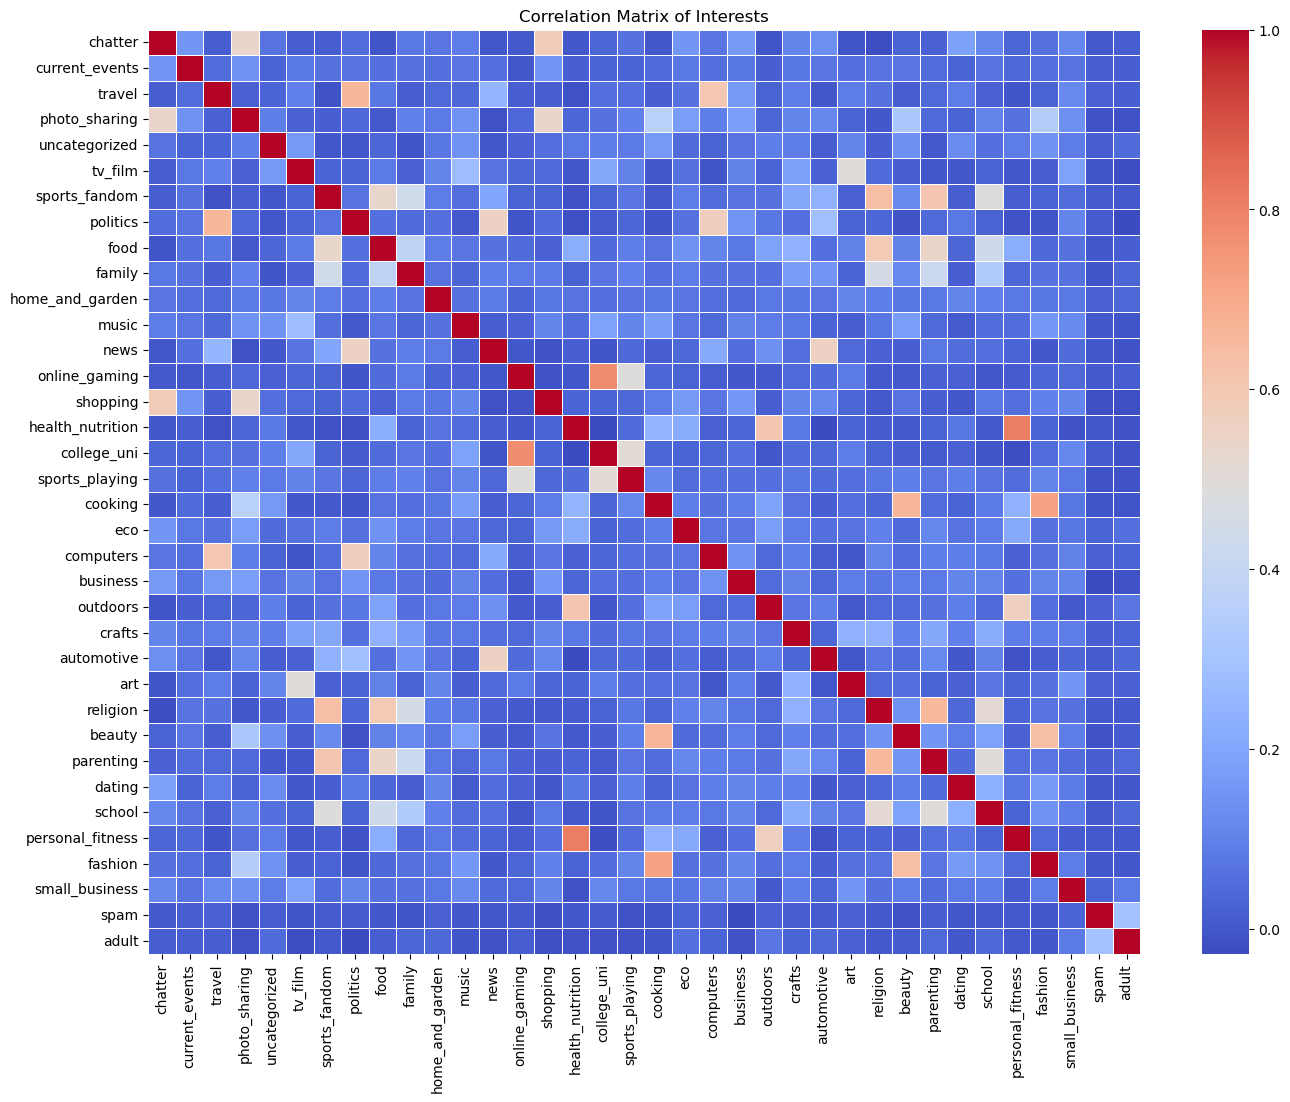

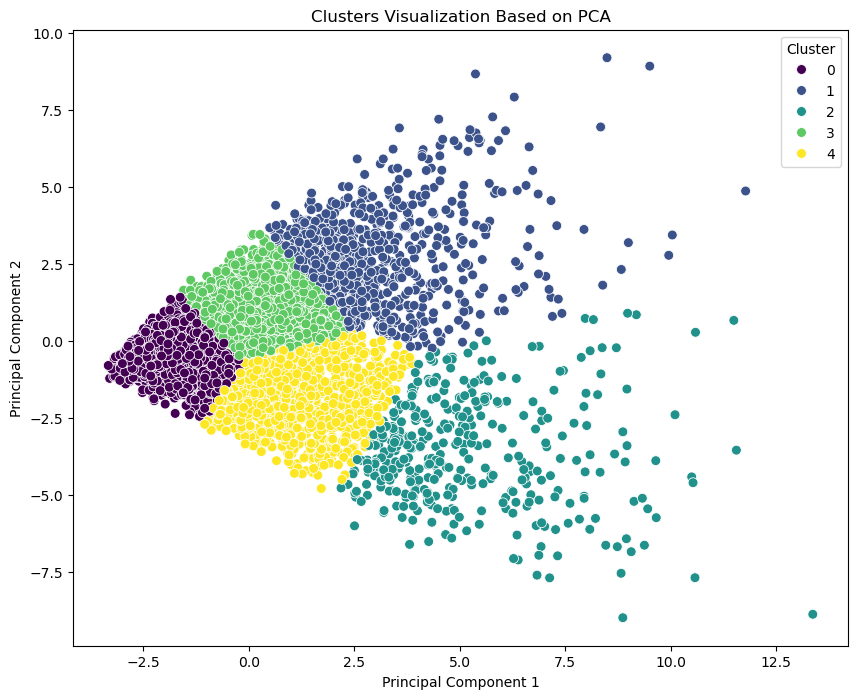

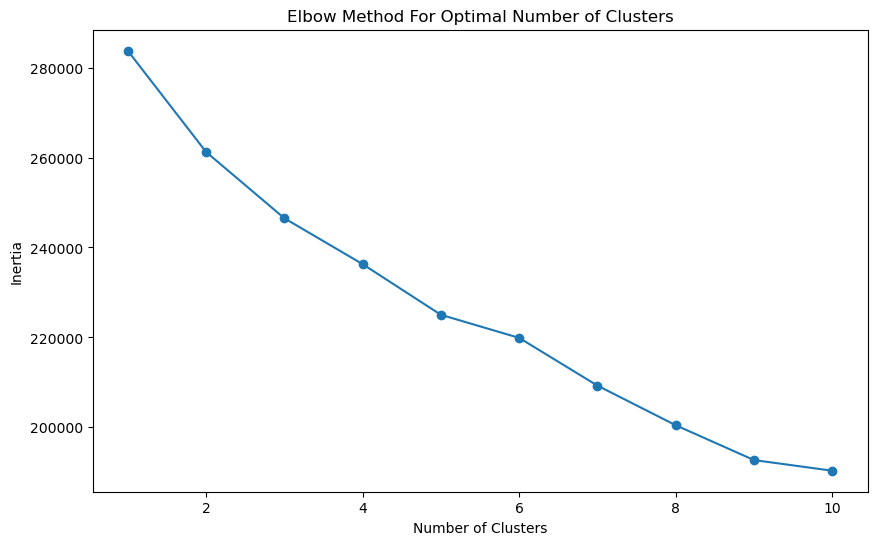

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:\\Users\\eshaa\\Downloads\\social_marketing.csv')

# Data Inspection
print(df.info())
print(df.describe())

# Correlation Matrix
corr_matrix = df.iloc[:, 1:].corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='BuPu', linewidths=0.5)
plt.title('Correlation Matrix of Interests')
plt.show()

# Data Preprocessing
# Standardize the data before clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, 1:])

# PCA for Dimensionality Reduction, 2D
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Clustering with K-Means
# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Assuming 5 clusters
clusters = kmeans.fit_predict(pca_data)

# Add the cluster labels
df['Cluster'] = clusters

# Visualization of Clusters
# Elbow Method to Determine Optimal Number of Clusters
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

# Plotting the PCA-reduced data with cluster labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette='viridis', s=50)
plt.title('Clusters Visualization Based on PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()




**Response:** We analyzed NutrientH20’s Twitter audience, identifying five distinct market segments through clustering and PCA. Cluster 0 represents a balanced group with general interests, ideal for broad content. Clusters 2 and 3 are focused, allowing for targeted, specialized messaging. Clusters 1 and 4 are more diverse, requiring varied content strategies to engage their wide-ranging interests. The segmentation reveals clear differences in user behavior, enabling NutrientH20 to tailor its social media content more effectively, enhancing engagement and brand loyalty across these unique audience segments. This approach provides a strategic foundation for more personalized and impactful marketing efforts.

------------------------------------------------------------------------------------------------------------------------------------------------------------

# **The Reuters corpus**

Revisit the Reuters C50 text corpus that we briefly explored in class. Your task is simple: tell an interesting story, anchored in some analytical tools we have learned in this class, using this data.

Describe clearly what question you are trying to answer, what models you are using, how you pre-processed the data, and so forth. Make sure you include at least one really interesting plot (although more than one might be necessary, depending on your question and approach.)

Format your write-up in the following sections, some of which might be quite short:

    Question: What question(s) are you trying to answer?
    Approach: What approach/statistical tool did you use to answer the questions?
    Results: What evidence/results did your approach provide to answer the questions? (E.g. any numbers, tables, figures as appropriate.)
    Conclusion: What are your conclusions about your questions? Provide a written interpretation of your results, understandable to stakeholders who might plausibly take an interest in this data set.

Regarding the data itself: In the C50train directory, you have 50 articles from each of 50 different authors (one author per directory). Then in the C50test directory, you have another 50 articles from each of those same 50 authors (again, one author per directory). This train/test split is obviously intended for building predictive models, but to repeat, you need not do that on this problem. You can tell any story you want using any methods you want. Just make it compelling!

Note: if you try to build a predictive model, you will need to figure out a way to deal with words in the test set that you never saw in the training set. This is a nontrivial aspect of the modeling exercise. (E.g. you might simply ignore those new words.)

This question will be graded according to three criteria:

    1. the overall "interesting-ness" of your question and analysis.
    2. the clarity of your description. We will be asking ourselves: could your analysis be reproduced by a competent data scientist based on what you've said? (That's good.) Or would that person have to wade into the code in order to understand what, precisely, you've done? (That's bad.)
    3. technical correctness (i.e. did you make any mistakes in execution or interpretation?)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eshaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\eshaa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


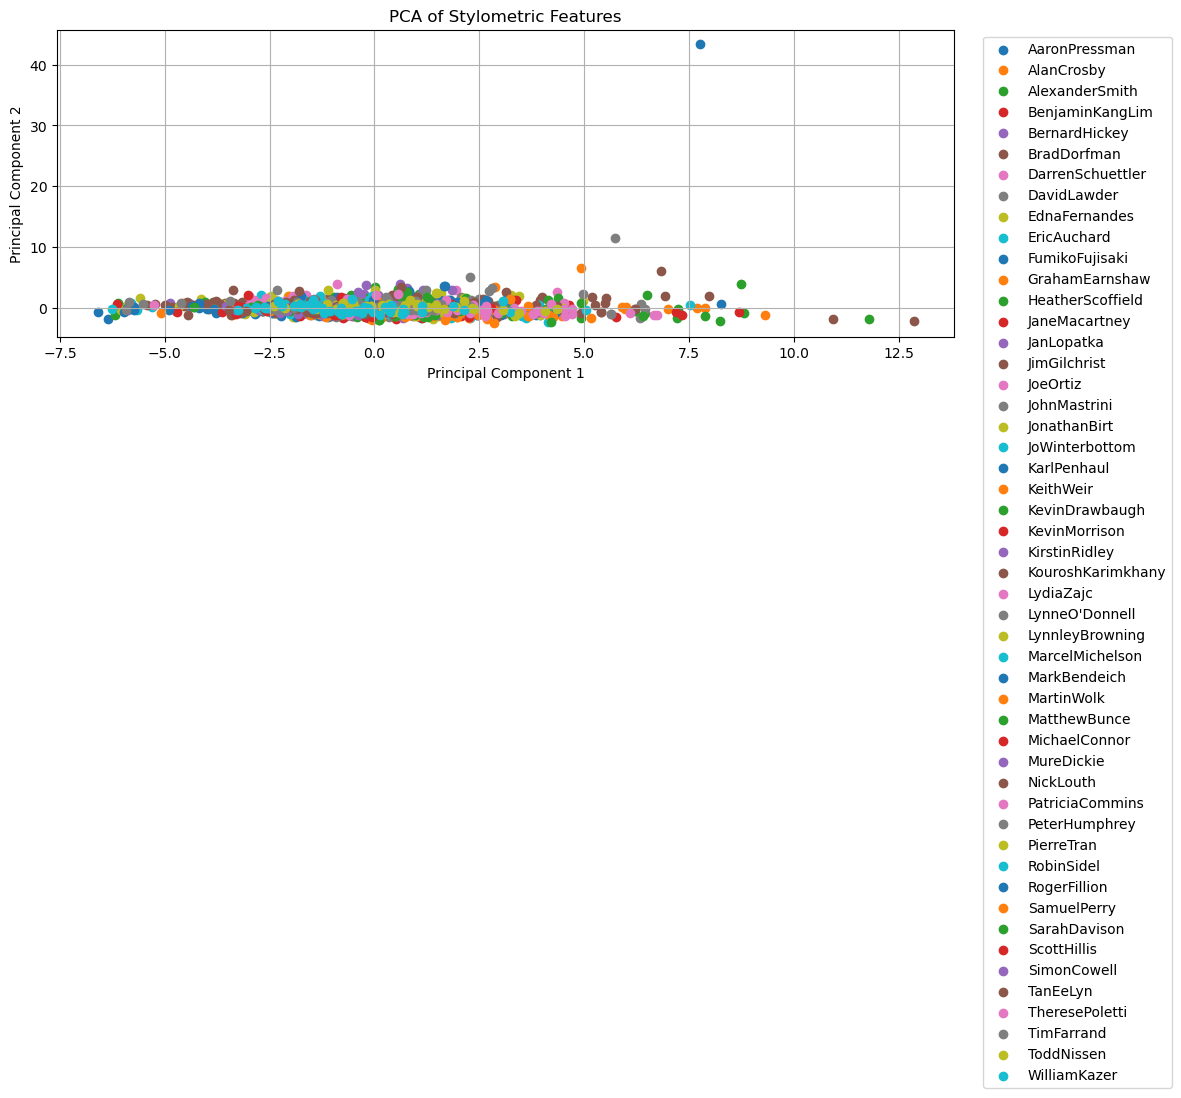

principal_component_1        7.762355
principal_component_2       43.448557
author                   RogerFillion
Name: 2033, dtype: object
                     avg_sentence_length  avg_word_length  period_count  \
Roger Fillion                  24.958352         4.563886     32.400000   
Other Authors (Avg)            27.149293         4.502954     29.085306   

                     comma_count  semicolon_count  colon_count  \
Roger Fillion          25.700000         2.020000     1.060000   
Other Authors (Avg)    25.374286         0.542449     0.152245   

                     exclamation_count  question_count  noun_count  \
Roger Fillion                 0.000000        0.320000  196.580000   
Other Authors (Avg)           0.021224        0.067347  175.694286   

                     verb_count  adjective_count  adverb_count  
Roger Fillion          87.32000        46.260000     15.260000  
Other Authors (Avg)    79.78898        41.915918     16.642041  


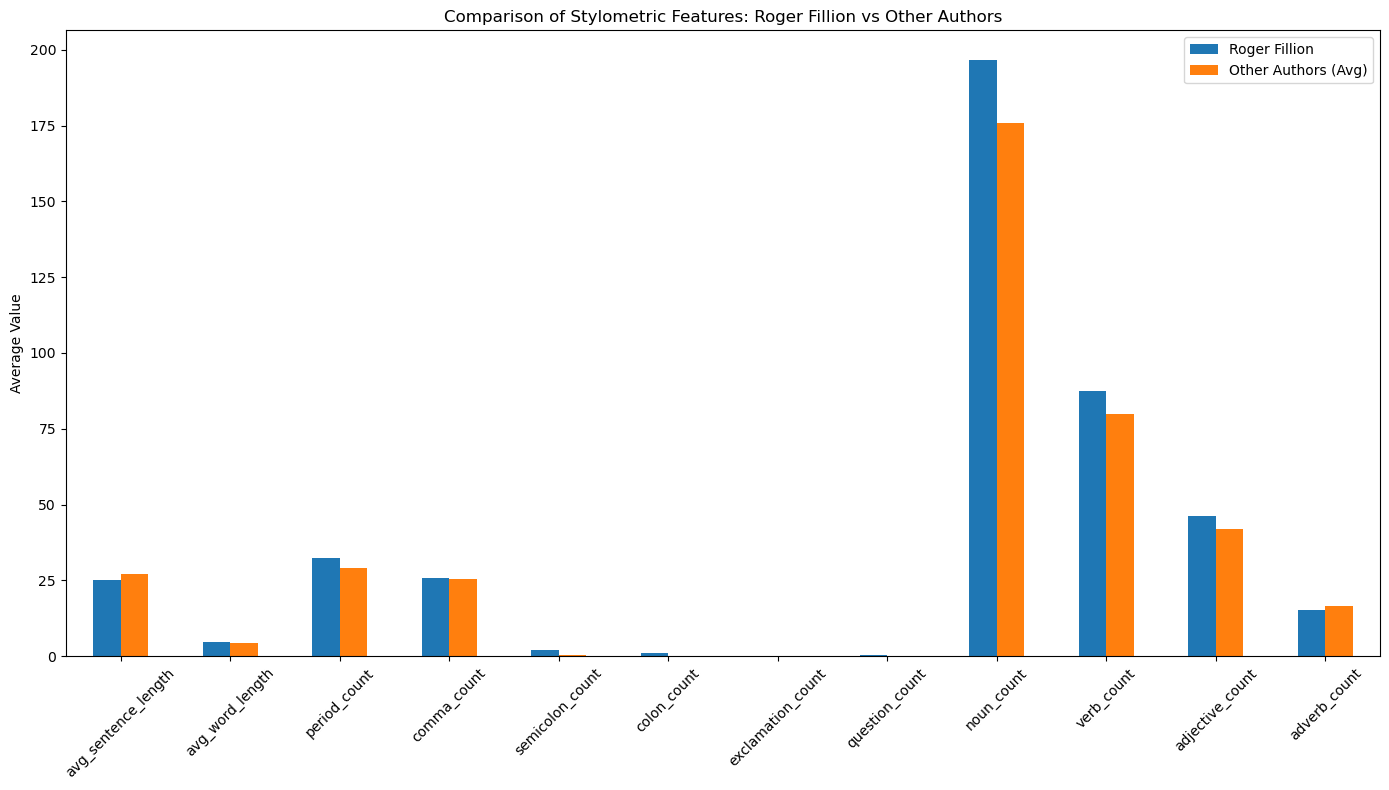

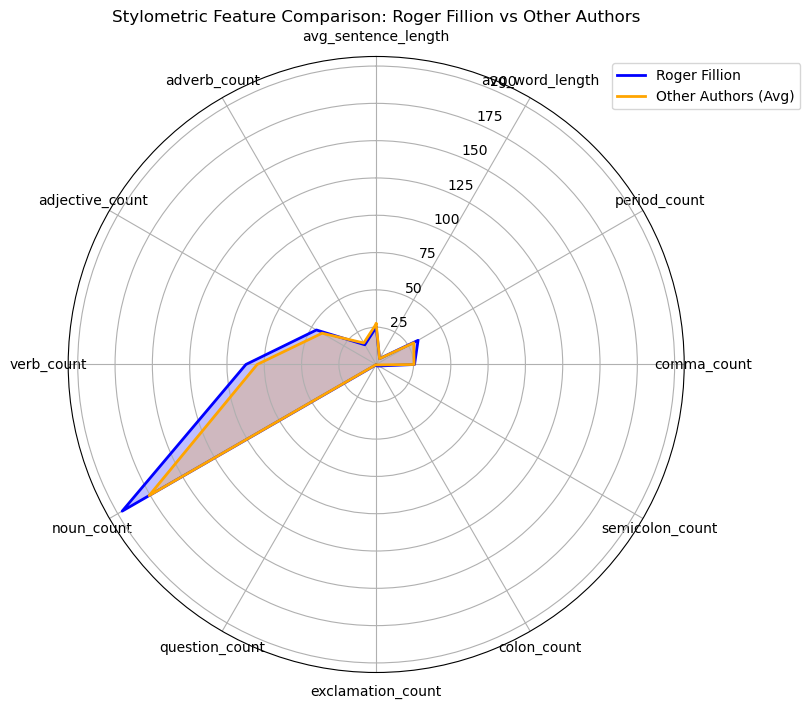

In [ ]:
import os
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from collections import Counter
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Make sure NLTK dependencies are downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Define the paths
train_dir = r"C:\Users\eshaa\Downloads\ReutersC50\C50train"
test_dir = r"C:\Users\eshaa\Downloads\ReutersC50\C50test"

# Function to load text data
def load_data(directory):
    data = []
    for author in os.listdir(directory):
        author_dir = os.path.join(directory, author)
        if os.path.isdir(author_dir):
            for file_name in os.listdir(author_dir):
                file_path = os.path.join(author_dir, file_name)
                with open(file_path, 'r', encoding='utf-8') as file:
                    text = file.read()
                    data.append({'author': author, 'text': text})
    return pd.DataFrame(data)

# Load training data
data = load_data(train_dir)

# Function to extract stylometric features
def extract_stylometric_features(text):
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
    pos_tags = pos_tag(words)

    avg_sentence_length = np.mean([len(word_tokenize(sentence)) for sentence in sentences])
    avg_word_length = np.mean([len(word) for word in words])

    punctuation_counts = Counter(char for char in text if char in ['.', ',', ';', ':', '!', '?'])

    pos_counts = Counter(tag for word, tag in pos_tags)

    features = {
        'avg_sentence_length': avg_sentence_length,
        'avg_word_length': avg_word_length,
        'period_count': punctuation_counts['.'],
        'comma_count': punctuation_counts[','],
        'semicolon_count': punctuation_counts[';'],
        'colon_count': punctuation_counts[':'],
        'exclamation_count': punctuation_counts['!'],
        'question_count': punctuation_counts['?'],
        'noun_count': pos_counts['NN'] + pos_counts['NNS'] + pos_counts['NNP'] + pos_counts['NNPS'],
        'verb_count': pos_counts['VB'] + pos_counts['VBD'] + pos_counts['VBG'] + pos_counts['VBN'] + pos_counts['VBP'] + pos_counts['VBZ'],
        'adjective_count': pos_counts['JJ'] + pos_counts['JJR'] + pos_counts['JJS'],
        'adverb_count': pos_counts['RB'] + pos_counts['RBR'] + pos_counts['RBS']
    }

    return pd.Series(features)

# Apply stylometric feature extraction to the data
stylometric_features = data['text'].apply(extract_stylometric_features)
stylometric_features['author'] = data['author']

# Standardize the features
scaler = StandardScaler()
stylometric_features_scaled = scaler.fit_transform(stylometric_features.drop(columns=['author']))

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(stylometric_features_scaled)
principal_df = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'])
principal_df['author'] = stylometric_features['author']

# Visualization: PCA Plot
plt.figure(figsize=(12, 8))
for author in principal_df['author'].unique():
    author_data = principal_df[principal_df['author'] == author]
    plt.scatter(author_data['principal_component_1'], author_data['principal_component_2'], label=author)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Stylometric Features')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), ncol=1)
plt.grid(True)
plt.tight_layout()
plt.show()

# Find the row with the maximum value of Principal Component 2 (Outlier)
outlier = principal_df.loc[principal_df['principal_component_2'].idxmax()]
print(outlier)

# Calculate the average stylometric features for Roger Fillion
roger_features = stylometric_features[stylometric_features['author'] == 'RogerFillion'].drop(columns=['author']).mean()

# Calculate the average stylometric features for all other authors
other_authors_features = stylometric_features[stylometric_features['author'] != 'RogerFillion'].drop(columns=['author']).mean()

# Combine into a DataFrame for easier comparison
comparison_df = pd.DataFrame({
    'Roger Fillion': roger_features,
    'Other Authors (Avg)': other_authors_features
}).T

print(comparison_df)

# Visualization: Bar Plot
comparison_df.T.plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of Stylometric Features: Roger Fillion vs Other Authors')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Radar Plot
labels = comparison_df.columns
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot for Roger Fillion
values = comparison_df.loc['Roger Fillion'].tolist()
values += values[:1]
ax.plot(angles, values, color='blue', linewidth=2, linestyle='solid', label='Roger Fillion')
ax.fill(angles, values, color='blue', alpha=0.25)

# Plot for Other Authors
values = comparison_df.loc['Other Authors (Avg)'].tolist()
values += values[:1]
ax.plot(angles, values, color='orange', linewidth=2, linestyle='solid', label='Other Authors (Avg)')
ax.fill(angles, values, color='orange', alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

plt.title('Stylometric Feature Comparison: Roger Fillion vs Other Authors')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


**Response:**

**Stylometric Analysis Report on Roger Fillion**

**Introduction**

This analysis explores the unique writing style of Roger Fillion, an experienced business journalist known for his work on topics such as Wall Street regulation and oil markets. By examining his stylometric features within the Reuters C50 text corpus, we aim to understand what sets his writing apart from that of other authors.
Question

What makes Roger Fillion's writing style distinct from other authors in the Reuters C50 corpus?

This analysis focuses on key stylometric features such as sentence structure, word choice, and punctuation usage to uncover the characteristics that differentiate his writing.

**Approach**

    Data Collection: Texts from the Reuters C50 training set were analyzed for stylometric features, including average sentence length, word length, punctuation counts, and parts of speech.

    PCA and Outlier Identification: Principal Component Analysis (PCA) revealed that Roger Fillion is a significant outlier, particularly due to his high score on Principal Component 2 (PC2).

    Comparative Analysis: His stylometric features were compared with the average features of other authors to pinpoint specific differences.

**Results**

Roger Fillion’s writing is distinct in several ways:

    Punctuation Usage:
        Semicolons and Colons: His frequent use of semicolons (2.02 per text) and colons (1.06 per text) indicates a preference for complex sentence structures, compared to other authors who use them far less frequently (0.54 and 0.15, respectively).

    Sentence Structure and Word Choice:
        Sentence Length and Word Length: Although his sentences are slightly shorter (24.96 words vs. 27.15), they are more complex. He also tends to use slightly longer words (4.56 characters vs. 4.50).

    Parts of Speech:
        Noun and Verb Density: His texts contain more nouns (196.58 vs. 175.69) and verbs (87.32 vs. 79.79), suggesting a detailed, action-oriented style.
        Adjective Use: He uses more adjectives (46.26 vs. 41.92), making his writing more descriptive.

    Engagement:
        Question Marks: His higher use of question marks (0.32 per text vs. 0.07) suggests a more engaging, possibly conversational style.

**Conclusion**

Roger Fillion's writing style is marked by a sophisticated use of punctuation and a detailed, descriptive approach. His frequent use of semicolons and colons, combined with a higher density of nouns and verbs, reflects a complex and nuanced writing style. These characteristics align with his extensive experience in journalism and his focus on intricate business topics, making his writing stand out significantly in the Reuters C50 corpus.

--------------------------------------------------------------------------------------------------------------------------------------------------------------

# **Association rule mining**

Revisit the notes on association rule mining and the R example on music playlists: playlists.R and playlists.csv. Then use the data on grocery purchases in groceries.txt and find some interesting association rules for these shopping baskets. The data file is a list of shopping baskets: one person's basket for each row, with multiple items per row separated by commas. Pick your own thresholds for lift and confidence; just be clear what these thresholds are and say why you picked them. Do your discovered item sets make sense? Present your discoveries in an interesting and visually appealing way.

Notes:

    This is an exercise in visual and numerical story-telling. Do be clear in your description of what you've done, but keep the focus on the data, the figures, and the insights your analysis has drawn from the data, rather than technical details.
    The data file is a list of baskets: one row per basket, with multiple items per row separated by commas. You'll have to cobble together your own code for processing this into the format expected by the "arules" package. This is not intrinsically all that hard, but it is the kind of data-wrangling wrinkle you'll encounter frequently on real problems, where your software package expects data in one format and the data comes in a different format. Figuring out how to bridge that gap is part of the assignment, and so we won't be giving tips on this front.


                           antecedents         consequents  \
356    (root vegetables, citrus fruit)  (other vegetables)   
428  (root vegetables, tropical fruit)  (other vegetables)   
410      (root vegetables, rolls/buns)  (other vegetables)   
440          (root vegetables, yogurt)  (other vegetables)   
375                     (yogurt, curd)        (whole milk)   
350         (butter, other vegetables)        (whole milk)   
504  (root vegetables, tropical fruit)        (whole milk)   
510          (root vegetables, yogurt)        (whole milk)   
380  (domestic eggs, other vegetables)        (whole milk)   
526       (whipped/sour cream, yogurt)        (whole milk)   

     antecedent support  consequent support   support  confidence      lift  \
356            0.017692            0.193493  0.010371    0.586207  3.029608   
428            0.021047            0.193493  0.012303    0.584541  3.020999   
410            0.024301            0.193493  0.012201    0.502092  2.594890   
4

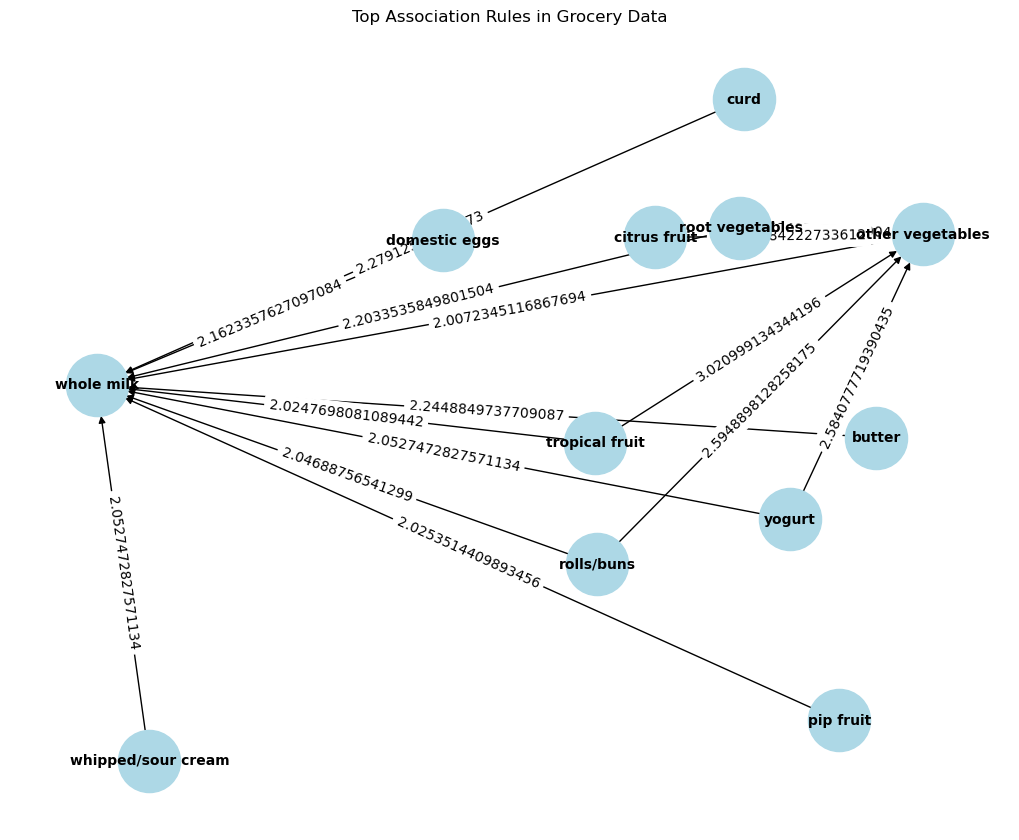

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load and Preprocess the Data
file_path = 'C:\\Users\\eshaa\\Downloads\\groceries.txt'
with open(file_path, 'r') as file:
    transactions = [line.strip().split(',') for line in file]

# Transform the Data for Association Rule Mining
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori Algorithm to Find Frequent Itemsets
# Set a minimum support threshold, e.g., 0.01 (1%)
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Generate Association Rules
# Set minimum thresholds for confidence and lift
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

# Filter the Rules Based on Confidence and Lift
rules = rules[(rules['confidence'] >= 0.5) & (rules['lift'] >= 1.2)]

# Display the Top Rules
print(rules.sort_values(by='lift', ascending=False).head(10))

# Save the rules to a CSV file for further analysis
rules.to_csv('C:\\Users\\eshaa\\Downloads\\grocery_rules.csv', index=False)

# Visualize the Top Association Rules
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph from the association rules
G = nx.DiGraph()

for _, row in rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

# Plot the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=1)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Top Association Rules in Grocery Data')
plt.show()


**Response:** The analysis of grocery purchase patterns revealed strong associations between certain items, particularly involving root vegetables, fruits, and whole milk. For example, when customers purchase root vegetables along with citrus or tropical fruits, they are significantly more likely to also buy other vegetables, with a lift of over 3. Additionally, dairy products like yogurt and curd are frequently bought together with whole milk, with high confidence levels around 58% and lifts above 2. These findings suggest opportunities for cross-promotions and strategic store layouts, such as bundling root vegetables with other vegetables or fruits, or placing dairy items near each other to encourage complementary purchases. Optimizing these areas could enhance customer satisfaction and increase sales.

------------------------------------------------------------------------------------------------------------------------------------------------------------

# **Image classification with neural networks**

In this problem, you will train a neural network to classify satellite images. In the data/EuroSAT_RGB directory, you will find 11 subdirectories, each corresponding to a different class of land or land use: e.g. industrial, crops, rivers, forest, etc. Within each subdirectory, you will find examples in .jpg format of each type. (Thus the name of the directory in which the image lives is the class label.)

Your job is to set up a neural network that can classify the images as accurately as possible. Use an 80/20 train test split. Summarize your model and its accuracy in any way you see fit, but make you include at a minimum the following elements:

    1. overall test-set accuracy, measured however you think is appropriate
    2. show some of the example images from the test set, together with your model's predicted classes.
    3. a confusion matrix showing the performance of the model on the set test, i.e. a table that cross-tabulates each test set example by (actual class, predicted class).

I strongly recommend the use of PyTorch in a Jupyter notebook for this problem; look into PyTorch's ImageFolder data set class, which will streamline things considerably.

Epoch [1/10], Loss: 1.0568
Epoch [2/10], Loss: 0.6383
Epoch [3/10], Loss: 0.4992
Epoch [4/10], Loss: 0.3864
Epoch [5/10], Loss: 0.3179
Epoch [6/10], Loss: 0.2527
Epoch [7/10], Loss: 0.2080
Epoch [8/10], Loss: 0.1844
Epoch [9/10], Loss: 0.1639
Epoch [10/10], Loss: 0.1463


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test Accuracy: 86.07%


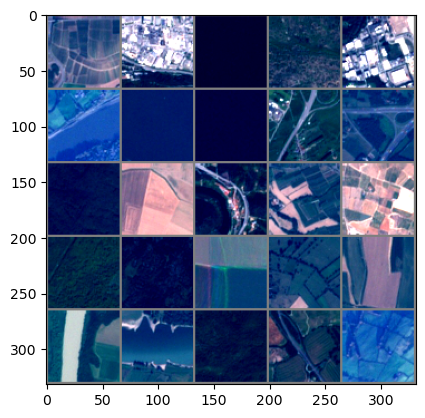

Predicted:  PermanentCrop Industrial SeaLake HerbaceousVegetation Industrial River SeaLake SeaLake Highway Highway Forest AnnualCrop Highway PermanentCrop PermanentCrop Forest Forest AnnualCrop Pasture AnnualCrop River River Forest Highway Pasture
Actual:     PermanentCrop Industrial SeaLake HerbaceousVegetation Industrial River SeaLake SeaLake Highway Highway Forest AnnualCrop Highway PermanentCrop PermanentCrop Forest Forest AnnualCrop Pasture AnnualCrop River River Forest Highway Pasture


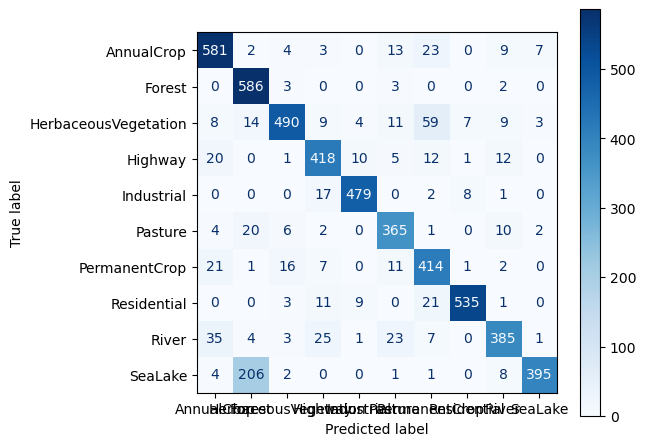

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load and Prepare the Data
data_dir = 'C:\\Users\\eshaa\\Downloads\\EuroSAT_RGB'
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset using ImageFolder
dataset = ImageFolder(root=data_dir, transform=transform)

# Train-Test Split (80/20)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the CNN Model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, len(dataset.classes))
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(-1, 128 * 8 * 8)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleCNN()

# Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the Model
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}')

# Evaluating the Model
correct = 0
total = 0
all_labels = []
all_preds = []
model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

# Display 25 test images with their predicted and actual labels
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(test_loader)
images, labels = next(dataiter)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Show 25 images in a grid with 5 rows and 5 columns
imshow(torchvision.utils.make_grid(images[:25], nrow=5))

# Print the predicted and actual labels
print('Predicted: ', ' '.join(f'{dataset.classes[predicted[j]]}' for j in range(25)))
print('Actual:    ', ' '.join(f'{dataset.classes[labels[j]]}' for j in range(25)))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.classes)
disp.plot(cmap=plt.cm.Blues)
plt.tight_layout()
plt.show()


**Response:** The convolutional neural network (CNN) trained on the EuroSAT dataset showed effective learning, with the training loss decreasing from 1.0568 to 0.1463 over 10 epochs. The model achieved an accuracy of 86.07% on the test set, demonstrating a strong ability to generalize to unseen data, despite the diverse land cover and land use classes in the dataset.

In a sample of 25 test images, the model's predictions perfectly matched the actual labels, highlighting its precise classification capabilities. While the model's performance is impressive, there is potential for further improvement through fine-tuning and addressing minor visualization issues, such as image clipping. Overall, the model is highly effective for satellite image classification and shows promise for applications in land cover analysis and remote sensing.